In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv
Saving bonds.csv to bonds.csv
Saving BTC.csv to BTC.csv
Saving CME_HO1.csv to CME_HO1.csv
Saving CME_NG1.csv to CME_NG1.csv
Saving daily_rates.csv to daily_rates.csv
Saving diet.csv to diet.csv
Saving DJI.csv to DJI.csv
Saving ETH.csv to ETH.csv
Saving HRB.csv to HRB.csv
Saving MSFT.csv to MSFT.csv
Saving NOAA_TAVG.csv to NOAA_TAVG.csv
Saving Sprint_Intraday.txt to Sprint_Intraday.txt
Saving stocks.csv to stocks.csv
Saving UFO.csv to UFO.csv
Saving x.csv to x.csv
Saving y.csv to y.csv


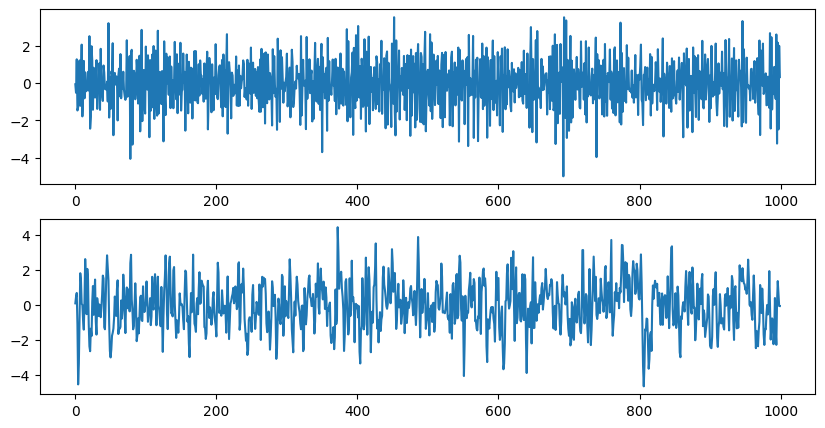

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

# Plot 2: MA parameter: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2);

In [ ]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

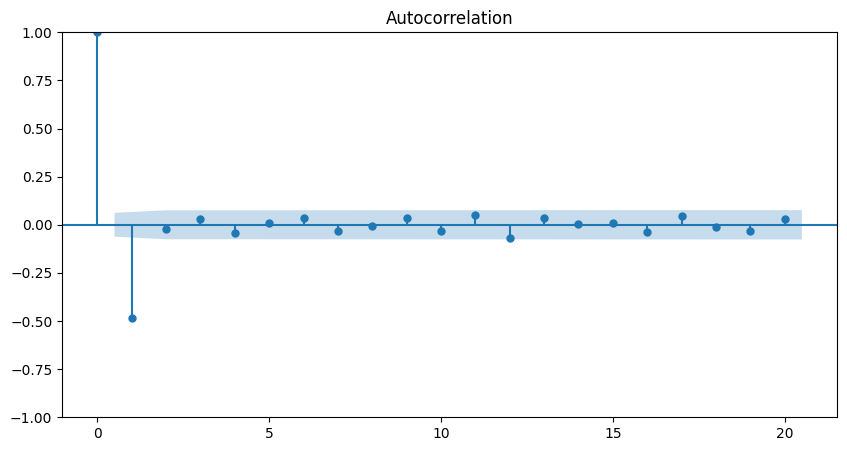

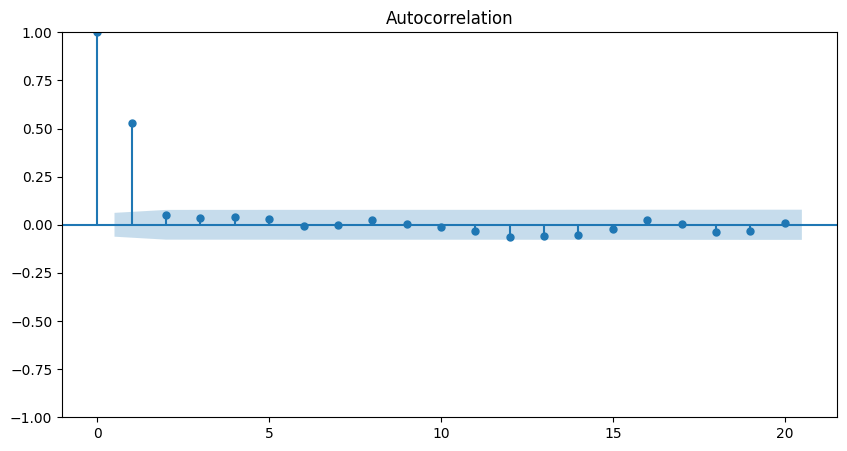

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20);

# Plot 2: MA parameter = +0.9
plot_acf(simulated_data_2, lags=20);

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model (order=(0,1,0)) to the first simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1408.157
Date:                Sat, 05 Jul 2025   AIC                           2822.313
Time:                        11:45:03   BIC                           2837.036
Sample:                             0   HQIC                          2827.909
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.003     -1.153      0.249      -0.009       0.002
ma.L1         -0.9097      0.014    -65.757      0.000      -0.937      -0.883
sigma2         0.9770      0.045     21.904      0.0

In [9]:
intraday = pd.read_csv('Sprint_Intraday.txt', header=None)
intraday = intraday.loc[:, :1]
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [10]:
# Change the first date to zero
intraday.iloc[0, 0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the 'DATE' column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


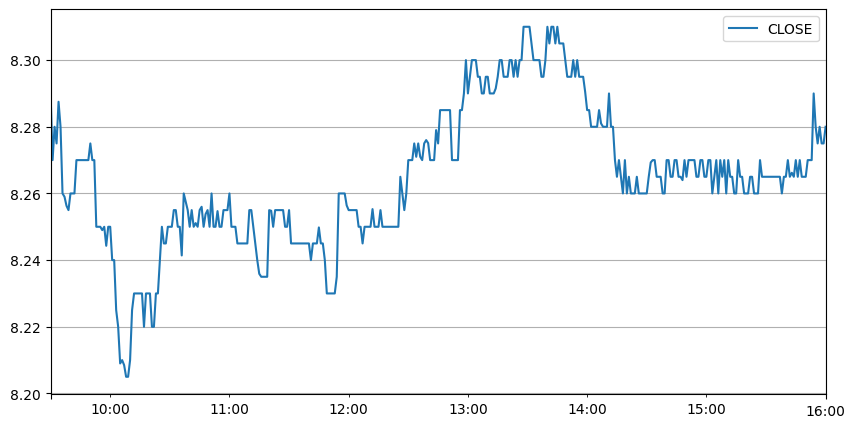

In [11]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True);

const    -6.832078e-06
ma.L1    -1.717162e-01
sigma2    4.150534e-07
dtype: float64


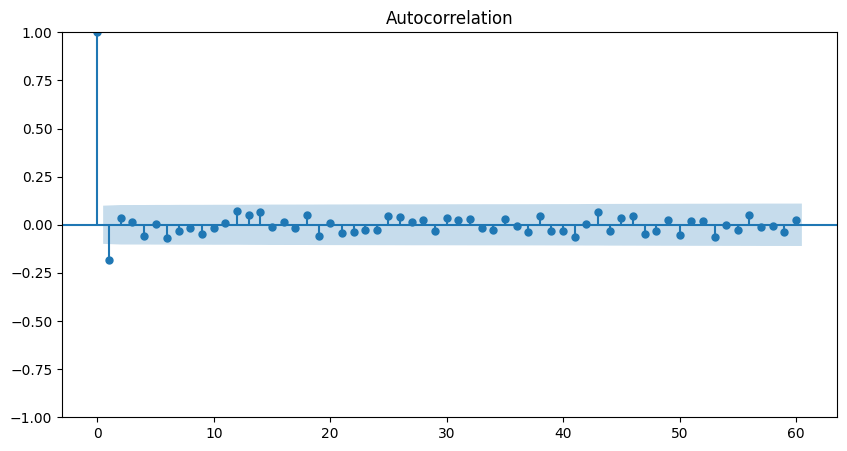

In [12]:
# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60);

# fit the data to an MA(1) model
mod = ARIMA(returns, order=(0, 0, 1))
res = mod.fit()
print(res.params)

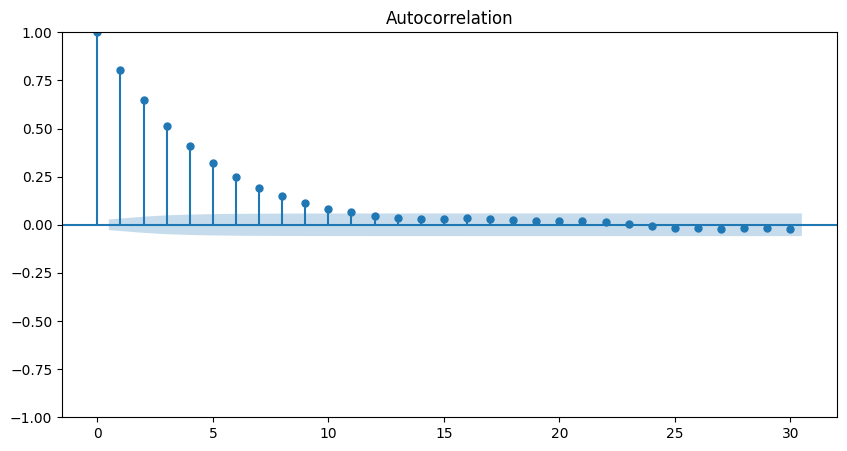

In [13]:
from statsmodels.tsa.arima_process import ArmaProcess

# build a list MA parameters
ma = [0.8 ** i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30);